# Titanic Data Exploratory Analysis 

## Background 
The purpose of this document is to analyze the titanic dataset provided on kaggle (https://www.kaggle.com/c/titanic/data) to uncover some of the factors that went into the survival rate of the passengers on that ship. The main goal is to practice data analysis and visualization in python and to go through the entire analytical process, from the hypothesis to the conclusion. If there is time, I will also make a scikit model. 

## Reseach Questions 
The titanic dataset contains information on just under 900 people that went abord the titanic ship. Having no background on the titanic (I did not watch the movie), I would assume the factors that impacts the survival rating the most would be age (and gender), title(ticket prices), and family
- younger people are physically capable than older people, and men are statistically stronger than women. These variables will directly impact survival 
- title: rich people with cabin space will probably survive as they would have first priority on the livesaving vessles 
- family: the more family members, the more people to account for. If a mother is looking for her child or vice-versa, they both would have a lower chance of survival 

In [1]:
# importing libraries and dataset (pandas and numpy)
import pandas as pd 
from pandas import Series, DataFrame 

import numpy as np 
import os 
import matplotlib.pyplot as plt 
%matplotlib inline 



In [2]:
# import dataframe from CSV 
df = pd.read_csv(r'titanic_data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
for column in df:
    print df[column].value_counts()

891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
      ..
561    1
560    1
584    1
585    1
586    1
587    1
610    1
609    1
608    1
607    1
606    1
605    1
604    1
603    1
602    1
601    1
600    1
599    1
598    1
597    1
596    1
595    1
594    1
593    1
592    1
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Graham, Mr. George Edward                                  1
Elias, Mr. Tannous                                         1
Madill, Miss. Georgette Alexandra                          1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)        1
Beane, Mrs. Edward (Ethel Clarke)                          1
Roebling, Mr.

## Missing values 

There are missing values for both the age, embarked and cabin values. The cabin values are understandable, since not every passenger would be assigned a cabin. Cabins would be a luxury of those who paid higher ticket prices. I would assume that the deck would be the other place.

There are two missing values for the embarked column, which we may be able to infer based on the ticket price or another factor. 
Lastly, and most importantly, a few hundred entries do not have age associated, which is shocking, as we would have to predict the age using SCIKIT learn. 

In [6]:
# to get a better understanding of the age distribution, lets check a histogram of the age 

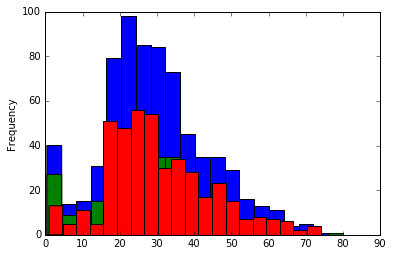

In [9]:
df.Age.plot(kind = 'hist', bins = 20)
survived = df.loc[df.Survived == 1]
survived.Age.plot(kind = 'hist', bins = 20)
died = df.loc[df.Survived == 0]
died.Age.plot(kind = 'hist', bins = 20)

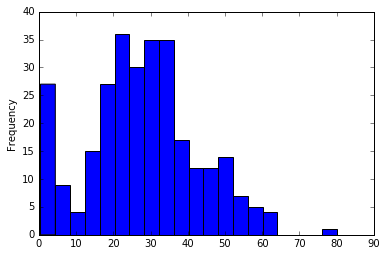

In [10]:
survived = df.loc[df.Survived == 1]
survived.Age.plot(kind = 'hist', bins = 20)

In [11]:
died = df.loc[df.Survived == 0]

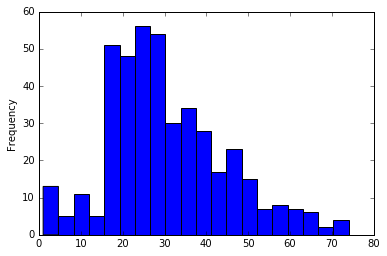

In [12]:
died.Age.plot(kind = 'hist', bins = 20)

If you look, more of the younger population survived, and more of the older population did not survive. 
A majority of the chidlren under 10 survived and most of the teens between 10 and 20 also survived. This might be due to the fact that younger children were given first priority to the emergency vessles and those who were younger were more athletic to stand the freezing temperature of the ice-water 

For each age range, find the percentage of people that survived vs died. 
How do we do this? How about lets look at the missing data first. See how many of those survived 

In [13]:
missing = df.loc[df.Age.isnull() == True]

In [14]:
# as you can see, most of these passengers are in the lowest economical class and was not assigneda cabin 
# did someone just forget about the age of these passengers? What are the differences between this and the regular dataframe 

In [15]:
# first, lets look at the average PClass of the missing vs the non-missing 
not_missing = df.loc[df.Age.isnull() == False]

In [16]:
not_missing.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [17]:
print missing.Pclass.describe()
print ('-----------------------')
print not_missing.Pclass.describe()
# same class 

count    177.000000
mean       2.598870
std        0.763216
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
-----------------------
count    714.000000
mean       2.236695
std        0.838250
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


In [18]:
# this missing variable has significantly more people of lower economic status, how about survival rate? 

In [19]:
print missing.Pclass.describe()
print ('-----------------------')
print not_missing.Pclass.describe()

count    177.000000
mean       2.598870
std        0.763216
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
-----------------------
count    714.000000
mean       2.236695
std        0.838250
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


In [20]:
# the people who did not survive did not have dates. Were they stowaways? 


In [21]:
print missing.Fare.describe()
print ('-----------------------')
print not_missing.Fare.describe()

count    177.000000
mean      22.158567
std       31.874608
min        0.000000
25%        7.750000
50%        8.050000
75%       24.150000
max      227.525000
Name: Fare, dtype: float64
-----------------------
count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64


In [22]:
# the people who were not missing paid a lot more money than those who were missing. 
# maybe this is because some people's ages were obtained retroactively? That those who did not survive had no 
# chance to give their age? 
print df.Age.max()

80.0


In [23]:
# since 80 is the largest value, we can do 8 total bins, to look at how many people survived in each period of their lives
# and the percentage 
bined  = pd.cut(df.Age, bins = 8)

In [24]:
bined.dtype

category

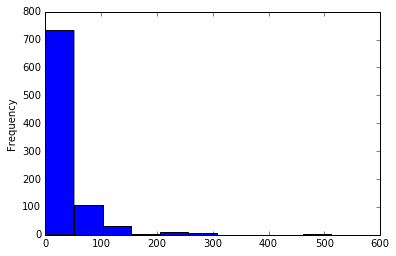

In [25]:
df.Fare.plot(kind = 'hist')

In [26]:
df.Fare = df.Fare.astype(int)

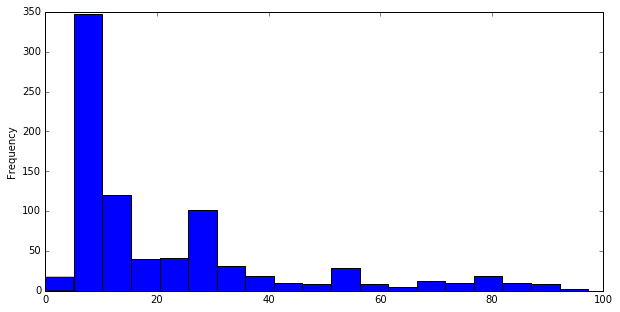

In [27]:
df.Fare.plot(kind = 'hist', bins = 100, figsize = (10, 5), xlim = (0,100))

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S


In [29]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

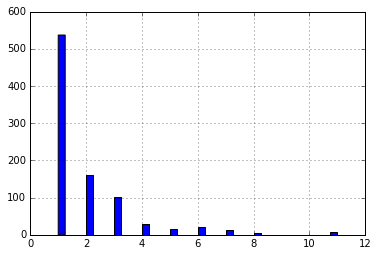

In [30]:
df.Family.hist(bins = 40)

In [31]:
# most don't have family, lets check how many people who do have family survive, lets do the count of those 
# who survive by family size 

In [54]:
print df.Family[df.Survived == 1].value_counts().sort_index()
print df.Family[df.Survived == 0].value_counts().sort_index()


1    163
2     89
3     59
4     21
5      3
6      3
7      4
Name: Family, dtype: int64
1     374
2      72
3      43
4       8
5      12
6      19
7       8
8       6
11      7
Name: Family, dtype: int64


In [1]:
df.Family[df.Survived == 1].value_counts().sort_index().plot(kind = 'bar', color = 'green', position = 0)
df.Family[df.Survived == 0].value_counts().sort_index().plot(kind = 'bar', color = 'red', position = 1)


NameError: name 'df' is not defined

In [60]:
family_survival_rate = df.Family[df.Survived == 1].value_counts().sort_index().divide(df.Family.value_counts().sort_index())

In [62]:
family_survival_rate

1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8          NaN
11         NaN
Name: Family, dtype: float64

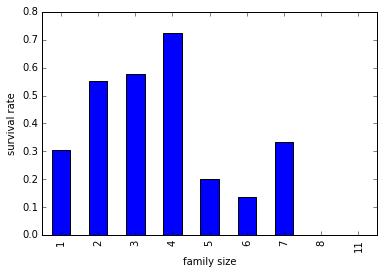

In [66]:
ax = family_survival_rate.plot(kind = 'bar')
ax.set(xlabel = 'family size')
ax.set(ylabel = 'survival rate')

In [67]:
#  next, analyze boxplot of passengers 


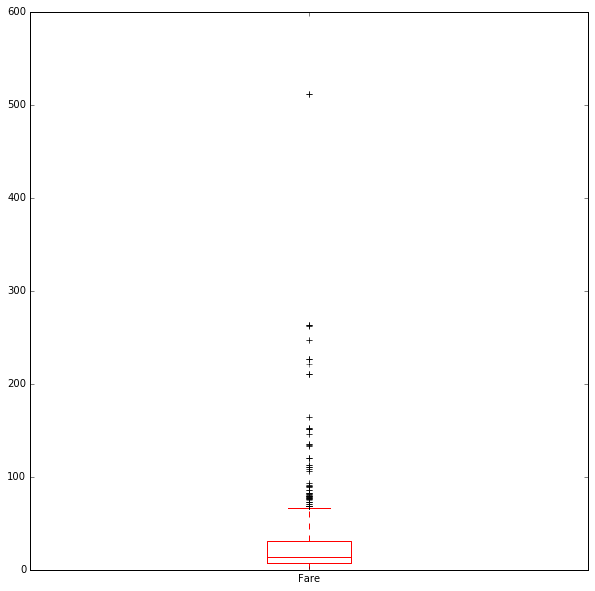

In [71]:
df.Fare.plot(kind = 'box', figsize = [10, 10], color = 'red')

In [74]:
df[df.Embarked.isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80,B28,NaN,1


In [82]:
# which sex pays more for tickets? They both have cabins, they both have the same ticket, are they related? 
# Were did they go? 

df.groupby('Sex').Fare.describe()

Sex          
female  count    314.000000
        mean      44.063694
        std       58.009053
        min        6.000000
        25%       12.000000
        50%       23.000000
        75%       55.000000
        max      512.000000
male    count    577.000000
        mean      25.103986
        std       43.147715
        min        0.000000
        25%        7.000000
        50%       10.000000
        75%       26.000000
        max      512.000000
Name: Fare, dtype: float64

Embarked
C    Axes(0.125,0.125;0.775x0.775)
Q    Axes(0.125,0.125;0.775x0.775)
S    Axes(0.125,0.125;0.775x0.775)
Name: Fare, dtype: object

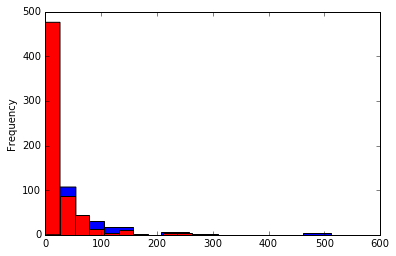

In [89]:
df.groupby('Embarked').Fare.plot(kind = 'hist')

(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

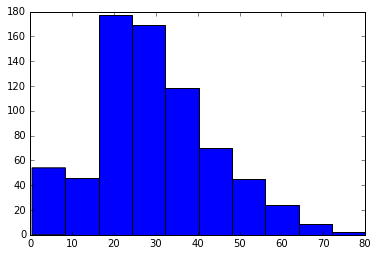

In [90]:
plt.hist(df.Age.dropna())

{'boxes': [<matplotlib.lines.Line2D at 0x120ca0510>],
 'caps': [<matplotlib.lines.Line2D at 0x120c60c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x120c2da90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x120c410d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x122379a10>,
  <matplotlib.lines.Line2D at 0x120c73290>]}

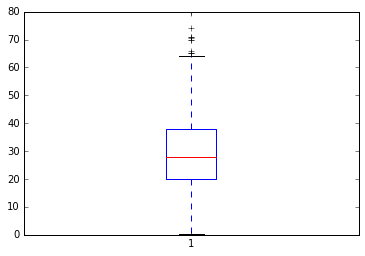

In [91]:
plt.boxplot(df.Age.dropna())

In [92]:
import seaborn as sns

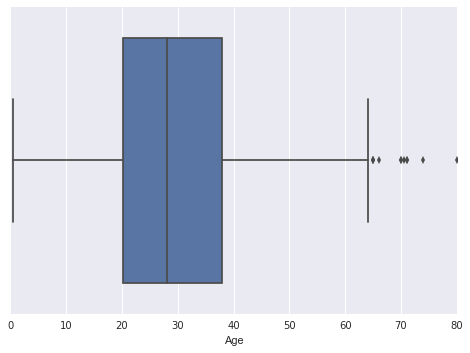

In [93]:
sns.boxplot(df.Age.dropna())

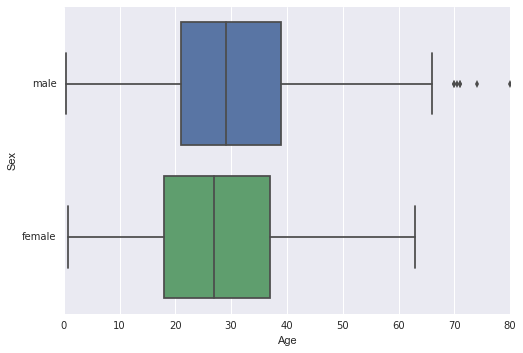

In [102]:
sns.boxplot(df.Age.dropna(), df.Sex)

KeyboardInterrupt: 

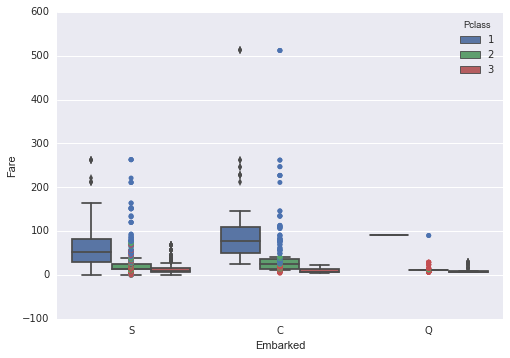

In [128]:
ax = sns.boxplot(y =df.Fare, x = df.Embarked, hue = df.Pclass)
ax = sns.swarmplot(y =df.Fare, x = df.Embarked, hue = df.Pclass)

In [123]:
ax

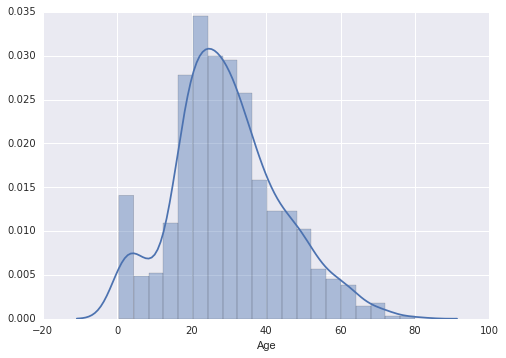

In [124]:
sns.distplot(df.Age.dropna())

In [129]:
# swarmplot takes a LOT of time to impliment 
# thus it does not do well in certain scenerios 

# Who makes it out alive? 
# lets look at cabins 


In [130]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [132]:
# we can see that cabins go through A, B, C, D, E, F and there is one T. What about NaN
df.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

In [137]:
# is having a cabin vital to survival?
print df[df.Cabin.isnull() == True].count()
print df[df.Cabin.isnull() == False].count()

# 687 of them are true , and 204 of them have a cabin 

PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
Family         687
dtype: int64
PassengerId    204
Survived       204
Pclass         204
Name           204
Sex            204
Age            185
SibSp          204
Parch          204
Ticket         204
Fare           204
Cabin          204
Embarked       202
Family         204
dtype: int64


In [149]:
# next, we add another column to indicate the presence of a cabin or not, we can use isnull() to add the column? 
# test 
df['has_cabin'] = df.Cabin.notnull()

In [154]:
df.groupby('has_cabin').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
has_cabin,,,,,,,,
False,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,18.732169,1.912664
True,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,75.745098,1.877451


In [155]:
# a lot of those WITH CABINS survived much more than those that did not have cabins. Those with cabins 
# also paid much more than those that did not have cabins. You can tell these were the most advantaged people 

In [160]:
# what about within cabins? 
df.Cabin[df.Cabin.isnull() == False].astype(str).str[0].value_counts().sort_index()

A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [161]:
# there are a few things with the decks, so we can see what each has 
df['Deck'] = df.Cabin[df.Cabin.isnull() == False].astype(str).str[0]

In [164]:
df.Deck.head(10)

0    NaN
1      C
2    NaN
3      C
4    NaN
5    NaN
6      E
7    NaN
8    NaN
9    NaN
Name: Deck, dtype: object

In [166]:
df.groupby('Deck').Survived.mean()
# decks B, D and E have the highest survival rate (A could have been the most prestgious rooms )


Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

In [167]:
df.groupby('Deck').mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,has_cabin
Deck,,,,,,,,,
A,439.600000,0.466667,1.000000,44.833333,0.133333,0.133333,39.266667,1.266667,True
B,521.808511,0.744681,1.000000,34.955556,0.361702,0.574468,113.191489,1.936170,True
C,406.440678,0.593220,1.000000,36.086667,0.644068,0.474576,99.728814,2.118644,True
D,475.939394,0.757576,1.121212,39.032258,0.424242,0.303030,56.787879,1.727273,True
E,502.437500,0.750000,1.312500,38.116667,0.312500,0.312500,45.593750,1.625000,True
F,370.384615,0.615385,2.384615,19.954545,0.538462,0.538462,18.384615,2.076923,True
G,216.000000,0.500000,3.000000,14.750000,0.500000,1.250000,13.000000,2.750000,True
T,340.000000,0.000000,1.000000,45.000000,0.000000,0.000000,35.000000,1.000000,True


In [168]:
# however, if we look, average fare is highest in B, which represnts the highest class 
# B, D and E have the highest survival rates, , which doesn't mean anything, has very little correlation with fare
# amongst those with cabins. 

On the titanic, this diagram of the decks show that the decks go from A - F in terms of the level. A is the top level, and F is the bottom level of the ship. With the exception of A, the fares are the highest from B going down to G. The P class also indicates this, as only rich, first-class passengers reside in cabins A, B and C 
However, Deck does not seem to be a good indicator of survival rating, because overall, the decks have pretty similar passenger survival. But the passengers with cabin assignments survive more than those who do not have passenger assignments. 

Note that this could also be that the data is lost, and we should hypothesize that each person would have had a deck assignment. We might be able to attibute the deck assignment based on fare, however, based on the data given and the amount of data missing compared ( 680 records missing compared to 204 complete records), this is not feasible. 

Even if we are able to deduce the cabin assignments, we still do not know for sure if they actually slept there in their assigned cabin. Were they in their cabin at the time of the crash? They could have been on the top deck (S deck) for all we know, so cabin assignment should be disregarded as a predictor. 

We also believe that every single passenger had a cabin, however, it is difficult to understand which cabin they are placed in. 

It seems like we have done most of our exploratory analysis. There is a family penalty, we have figured out some missing values, and have found out that a few things about those who survived and those who didn't. 

Now we can do scikit learn 

In [169]:
# import the machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# to be continued, but the result is we want a model and get the most important determinants of the model, that way, 
# we can test which factors are the most important in determining the survival of a passenger